# Exploratory Data Analysis (EDA) – Diagnostic Analysis

## Product Sales Performance Analysis

## How do product sales vary across different days of the week, and what insights can be drawn from the distribution of order volumes by product and day?

### 1. Overview

This diagnostic analysis aims to uncover meaningful patterns in product sales performance across different days of the week. By leveraging pivot tables and visual heatmaps, we explore how daily fluctuations in order volumes reflect customer purchasing behavior. The insights derived from this analysis are intended to inform strategic decisions in product stocking, marketing campaigns, and operational efficiency, ultimately driving sales growth and customer satisfaction.

### 2. Goal

- Understand how product sales volumes vary across the days of the week.
- Identify peak and low-performance days for each product.
- Reveal sales concentration trends to support demand forecasting.
- Provide visual insights for easier interpretation and decision-making.
- Equip sales and inventory teams with data-backed recommendations for optimizing schedules and stock levels.

### 3.  Business Challenge

- Uneven Sales Distribution: Inconsistent sales across the week could lead to overstocking or understocking.
- Lack of Day-Specific Product Strategy: Without knowing which products sell best on which days, marketing efforts may miss key opportunities.
- Operational Inefficiency: Misaligned staffing or logistics planning due to unpredictable order volumes.
- Missed Revenue Opportunities: Failure to capitalize on high-demand days with tailored promotions or upselling.

### 4. Methodology

- Data Preparation: Clean and structure sales data with clear date and product columns.
- Pivot Table Creation: Generate a cross-tab view to summarize unit purchases by product and day of week.
- Visual Analysis: Build a heatmap to highlight volume intensity and uncover patterns at a glance.
- Insight Extraction: Interpret high and low sales zones to understand demand cycles.
- Strategic Recommendations: Advise stakeholders on product scheduling, inventory management, and promotional timing based on insights.

### Import necessary libraries

In [9]:
import pandas as pd
import os
import glob

### Combine the sales data from all months into a single consolidated CSV file

In [11]:
folder_path = r"C:\Monthly_Sales"

# Retrieve all CSV files from the folder using glob
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# All CSV files combined as one DataFrame 
all_data = pd.concat([pd.read_csv(file) for file in all_files], ignore_index=True)

# Merged DataFrame saved into a new CSV
output_file = os.path.join(folder_path, "all_data.csv")
all_data.to_csv(output_file, index=False)

print("All files integrated into:", output_file)

All files integrated into: C:\Monthly_Sales\all_data.csv


### Load the updated DataFrame

In [13]:
# Skip Blank Rows if present in the dataset

df = pd.read_csv(r'C:\Monthly_Sales\all_data.csv', skip_blank_lines=True)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
0,175667,iPhone,1,700.0,04/24/24 19:12,"135 Meadow St, Boston, MA 02215"
1,175668,AA Batteries (4-pack),1,5.84,04/20/24 13:45,"592 4th St, San Francisco, CA 94016"
2,175669,AA Batteries (4-pack),1,5.84,04/28/24 09:17,"632 Park St, Dallas, TX 75001"
3,175670,AA Batteries (4-pack),2,5.84,04/23/24 14:06,"131 Pine St, San Francisco, CA 94016"
4,175671,Samsung Odyssey Monitor,1,409.99,04/23/24 12:13,"836 Forest St, Boston, MA 02215"


In [14]:
df.shape

(9661738, 6)

## Data Cleaning Process

Thoroughly clean and standardize the data to eliminate errors, ensure consistency, and build a solid foundation for meaningful insights.

### Find and remove rows with NaN values

In [17]:
df.isna().sum()

Order ID            25088
Product Name        25088
Units Purchased     25090
Unit Price          25090
Order Date          25091
Delivery Address    25092
dtype: int64

In [18]:
# If Nan value is present in Order ID and Unit Purchased, it will be impossible to manipulate the data.
# Therefore, drop Nan values in Order ID and Units Purchased.

df.dropna(subset=['Order ID', 'Units Purchased'], inplace=True)

In [19]:
# Check if Nan value is present

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     0
Unit Price          0
Order Date          1
Delivery Address    2
dtype: int64

In [20]:
# Further check if any NaN values or blank rows are present

blank_rows_na = df[df.isnull().any(axis=1)]
blank_rows_na

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
2195228,Charging Cable,1,14.95,05/24/24 07:04,"852 Hickory St, San Francisco, CA 94016",NaN
3001506,150766,iPhone,1,7,NaN,NaN


#### Find and remove rows with duplicate values

In [22]:
# Find duplicate values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
9661733     True
9661734     True
9661735     True
9661736     True
9661737     True
Length: 9636648, dtype: bool

In [23]:
# Remove duplicated values

df.drop_duplicates(inplace = True)

In [24]:
# Check again for duplicated values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
172530     False
2195228    False
3001506    False
6370083    False
6403571    False
Length: 171546, dtype: bool

### Verify and fix incorrect data types in the dataset

In [26]:
# check for data types

df.dtypes

Order ID            object
Product Name        object
Units Purchased     object
Unit Price          object
Order Date          object
Delivery Address    object
dtype: object

#### Fix incorrect data types

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df['Units Purchased'] = pd. to_numeric(df['Units Purchased'], errors='coerce')

df['Unit Price'] = pd. to_numeric(df['Unit Price'], errors='coerce')

In [29]:
# Verify the presence of NaN values remaining in the columns as a result of using errors='coerce' during data conversion.

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     1
Unit Price          2
Order Date          3
Delivery Address    2
dtype: int64

In [30]:
df = df.dropna()

### Change the data type to optimize memory usage (Optional)

In [32]:
df['Order ID'] = pd.to_numeric(df['Order ID'], downcast='integer') 
df['Product Name'] = df['Product Name'].astype('category')  
df['Units Purchased'] = df['Units Purchased']. astype('int8') 
df['Unit Price'] = pd.to_numeric(df['Unit Price'], downcast='float')   
df['Delivery Address'] = df['Delivery Address'].astype('category') 

## Expand the dataset with supplementary columns

### Add month column

In [35]:
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4
...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10


In [36]:
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April
...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October


### Add week day column

In [38]:
df['Day of Week'] = df['Order Date'].dt.strftime('%a')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue
...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon


### Add hour column

In [40]:
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12
...,...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon,8
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed,22
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed,13
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon,16


### Add city column

In [42]:
def city(address):
    return address.split(",")[1].strip(" ")

def state_abbrev(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Delivery Address'].apply(lambda x: f"{city(x)}  ({state_abbrev(x)})")
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19,Boston (MA)
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13,San Francisco (CA)
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9,Dallas (TX)
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14,San Francisco (CA)
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12,Boston (MA)


### Organize Data by Order Date Chronologically and Reindex

In [44]:
df = df.sort_values(by = 'Order Date')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
78282,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
68761,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
64303,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
63092,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
74502,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
44457,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
30663,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
49246,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
30770,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


In [45]:
df = df.reset_index(drop=True)
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
1,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
2,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
3,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
4,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
171538,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
171539,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
171540,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
171541,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


#### Add Total Sales column

In [47]:
df['Total Sales'] = df['Units Purchased'] * df['Unit Price']
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.98999,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.98999
1,151041,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99000
2,146765,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99000
3,145617,Amana Washing Machine,1,600.00000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00000
4,156535,iPhone,1,700.00000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00000


#### Format Unit Price and Total Sales to 2 decimal places

In [49]:
df['Unit Price'] = df['Unit Price'].apply(lambda x: "%.2f" % x)

In [50]:
df['Total Sales'] = df['Total Sales'].apply(lambda x: "%.2f" % x)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00
4,156535,iPhone,1,700.00,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00


#### Format Unit Price and Total Sales to numeric

In [52]:
df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Total Sales'] = pd.to_numeric(df['Total Sales'])

## Pivot Table 

In [54]:
pivot_table = df.pivot_table(index = 'Product Name', columns = 'Day of Week' , values = 'Units Purchased', 
                             aggfunc = 'sum', observed=False )
pivot_table

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Product Name,,,,,,,
AA Batteries (4-pack),3262,3329,3368,3174,3205,3294,3198
AAA Batteries (4-pack),3347,3519,3448,3457,3362,3485,3352
Alienware Monitor,581,560,570,564,509,556,521
Amana Dryer,94,106,89,87,85,88,73
Amana Washing Machine,88,99,92,90,77,75,90
Apple Airpods Headphones,2053,2166,2000,2096,1985,2082,2063
Bose SoundSport Headphones,1729,1919,1768,1789,1695,1795,1691
Dell Laptop,537,564,560,546,516,541,534
Dell UltraSharp Monitor,827,807,814,898,806,860,808


## Plot Product Sales Distribution by Day of the Week

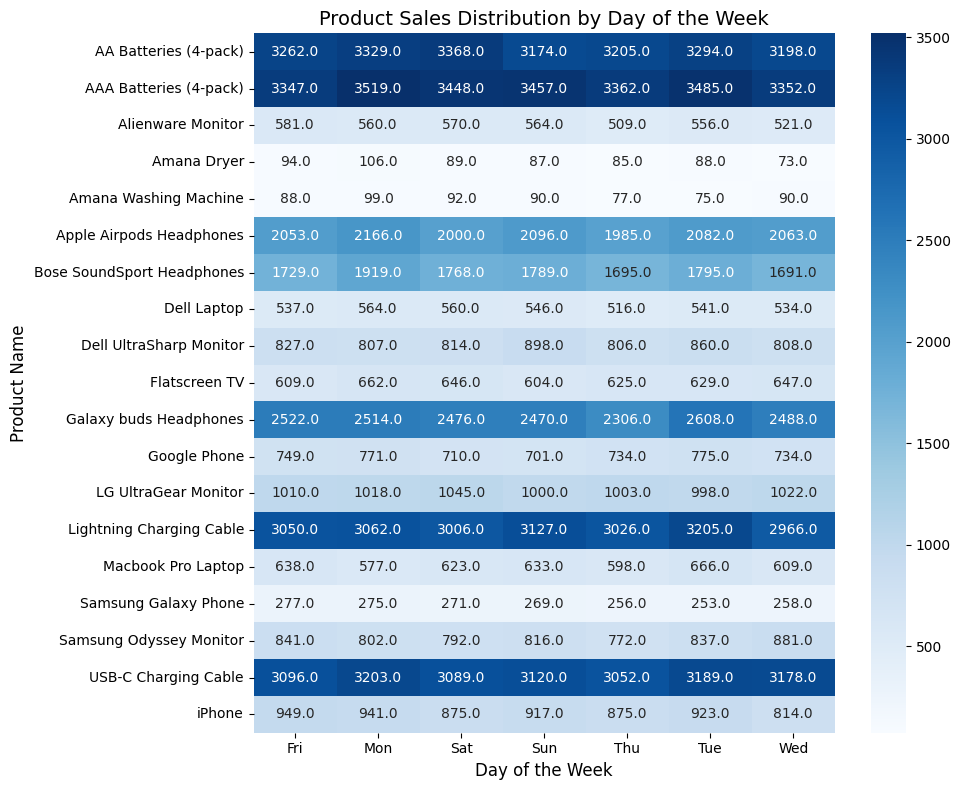

In [55]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(10, 8)) 
sns.heatmap(pivot_table, annot = True, cmap = 'Blues', fmt='.1f', annot_kws={'size': 10})

plt.title('Product Sales Distribution by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.tight_layout()
plt.savefig(r"C:/Users/DELL/OneDrive - COVENANT UNIVERSITY/Desktop/1/Product Sales Performance Analysis.png", dpi=300, bbox_inches='tight')

plt.show()

## Key Insights

1. High-Demand Essentials Stay Consistent All Week: AAA & AA Batteries, Lightning/USB-C Charging Cables, and Galaxy Buds maintain consistently high sales across all days — essential, everyday items with minimal day-of-week fluctuation.

2. Headphones Show Slight Weekend Preference: Apple Airpods, Galaxy Buds, and Bose Headphones see mild sales bumps on weekends (Sat–Sun) — likely driven by leisure time, gifting, or casual shopping.

3. Monitors & Laptops Lean Toward Early Week Activity: Alienware, LG UltraGear, and Samsung Odyssey Monitors show slightly better performance on Mondays and Tuesdays, possibly reflecting corporate or productivity-driven purchases.

4. Smartphones Steady but Subtle Decline Midweek: Products like iPhone, Google Phone, and Samsung Galaxy display more stable demand, though there's a minor dip midweek (especially for iPhones on Wed: 814, the lowest).

5. Large Appliances Are Low Volume Overall: Amana Dryers & Washing Machines have low sales throughout the week, with slightly better traction on Mondays, which might suggest weekend browsing and Monday decision-making.

6. Weekend Electronics Spike: Flatscreen TVs and Dell UltraSharp Monitors peak subtly on Sunday (TV: 604 → 898 for monitor), pointing to consumer behavior around weekend entertainment or research-buying patterns.

## Strategic Recommendations 

1. Optimize Inventory Based on Product Consistency

- Maintain steady stock levels for essentials like charging cables and batteries throughout the week.
- Automate inventory reorder alerts for these top movers.


2. Launch Targeted Promotions by Day/Product

- Push headphone and gadget promotions on weekends to align with consumer browsing behavior.
- Offer Monday discounts on laptops/monitors to catch productivity-driven buyers.


3. Re-evaluate Shelf and Online Placement for Low Performers
- Low-volume appliances may benefit from bundling strategies or financing offers promoted early in the week.


4. Align Ad Spend and Email Campaigns with Peak Days

- Promote tech accessories midweek and larger electronics toward the weekend.
- Use weekend email marketing to spotlight headphones, entertainment tech, and leisure-related items.